#### **Model Training**

- **Libraries**

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from scipy.stats import randint
import joblib

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize scaler and encoder
scaler = StandardScaler()
encoder = LabelEncoder()


**Out Put Path**

In [2]:
save_path = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\reports\figures"
os.makedirs(save_path, exist_ok=True)

- **load the Cleaned and encoded Data**

In [3]:
df2 = pd.read_csv(r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\data\Crop_recommendation_cleaned.csv")
df2.head()


,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon
1,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon
2,59,62,49,25.598693,93.351916,6.941497,114.778071,papaya
3,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya
4,30,51,32,22.914300,90.704756,5.603413,118.604465,apple


- **Feature and Target Variables** 

In [4]:
df2["label"].unique()

array(['muskmelon', 'watermelon', 'papaya', 'apple', 'mango', 'mothbeans',
       'mungbean', 'lentil', 'blackgram', 'coconut', 'pomegranate',
       'jute', 'maize', 'coffee', 'orange', 'chickpea', 'pigeonpeas',
       'rice', 'kidneybeans', 'grapes', 'cotton', 'banana'], dtype=object)

In [5]:
df2.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [6]:
features= ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target= 'label'

X=df2[features]
Y=df2[target]

#### **Transformation**

- **Encode Target**

In [7]:
le = LabelEncoder()
Y_scaled = le.fit_transform(Y)

#### **Split**
- To make sure that Test data is completely unseen during scaling → no leakage

In [8]:
# Split first
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, Y_scaled, test_size=0.2, random_state=42)

- **Scaler Transformation predictors variable**

In [9]:
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

## **Linear Models**

#### **Logistic Regression**

In [10]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

- **Cross Validation**

In [11]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_train
y = y_train

# Evaluate model with cross-validation
scores = cross_val_score(log_reg, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_lr= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_lr)

Cross-validation accuracies: [0.96590909 0.96875    0.94602273 0.96022727 0.96306818]
0.96


  - **Prediction**

In [12]:

y_pred = log_reg.predict(X_train)
print(y_pred[:6])
y_pred_test = log_reg.predict(X_test)
print(y_pred_test[:6])



[16 16  4  5  9 16]
[14  8  9 13  0 10]


- ##### **Evaluation**

- **MAE**

In [13]:
training_mae_lr =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_lr:.2f}");
test_mae_lr= mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_lr:.2f}"));

Training MAE: 0.28
Test MAE: 0.45
None


- **Accuracy**

In [14]:
mas_train_lr= accuracy_score(y_train, y_pred)
print(f"Logistic Regression's Train Accuracy is: {mas_train_lr:.2f}");
mas_test_lr = accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression's Test Accuracy is: {mas_test_lr:.2f}");

Logistic Regression's Train Accuracy is: 0.97
Logistic Regression's Test Accuracy is: 0.96


- **Confusion Matrix**

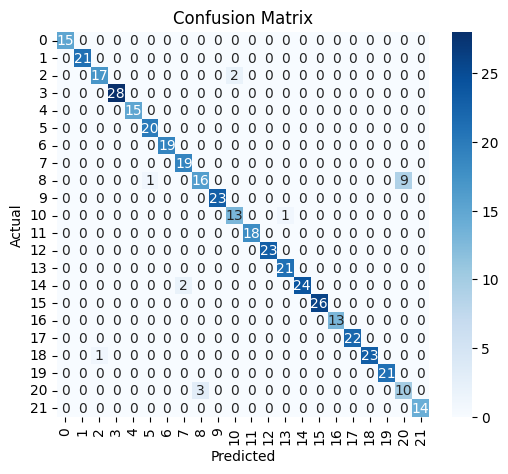

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Precision,Recall and F1 Score**

In [16]:
# Precision and recall (macro average for multiclass)
precision_lr = precision_score(y_test, y_pred_test, average='macro')
recall_lr = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
f1_lr = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_lr:.2f}")


Precision: 0.95
Recall: 0.96
F1-score:0.95


#### **Communication**

In [17]:
# Get feature names (assuming X_train is a NumPy array after scaling)
features = ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']

# Coefficients for each class (multi-class LR uses one-vs-rest by default)
coeff_df = pd.DataFrame(log_reg.coef_, columns=features, index=le.classes_)

# Display
print(coeff_df)


             Nitrogen  Phosphorous  Potassium  temperature  humidity  \
apple       -1.970518     2.281766  -0.521538    -0.902841  3.686717   
banana       2.613290     3.395626   2.728003     0.959425 -0.363190   
blackgram    0.458161     2.415272  -1.908626     1.225827 -0.503175   
chickpea    -0.852572     1.176920   3.856933    -1.436061 -0.844283   
coconut     -1.650650    -2.571874   0.021580     1.188125  2.447735   
coffee       3.028693    -2.418233  -0.512717     0.465123 -3.037433   
cotton       4.279872    -0.150193  -2.897117    -0.421054  1.763916   
grapes      -2.056528     2.302852   1.230426    -0.392881  1.196850   
jute         1.433375     0.356766   1.042321     0.462879  0.061223   
kidneybeans -0.400495     0.844484  -0.921294    -0.987294 -5.184775   
lentil      -2.015861     2.489985  -1.849071    -1.107139 -0.935667   
maize        1.695091    -0.325526  -2.612016    -1.256050 -1.674168   
mango       -1.462983    -2.679004   0.994248     1.096380 -2.97

- **Heatmap of Coefficients**

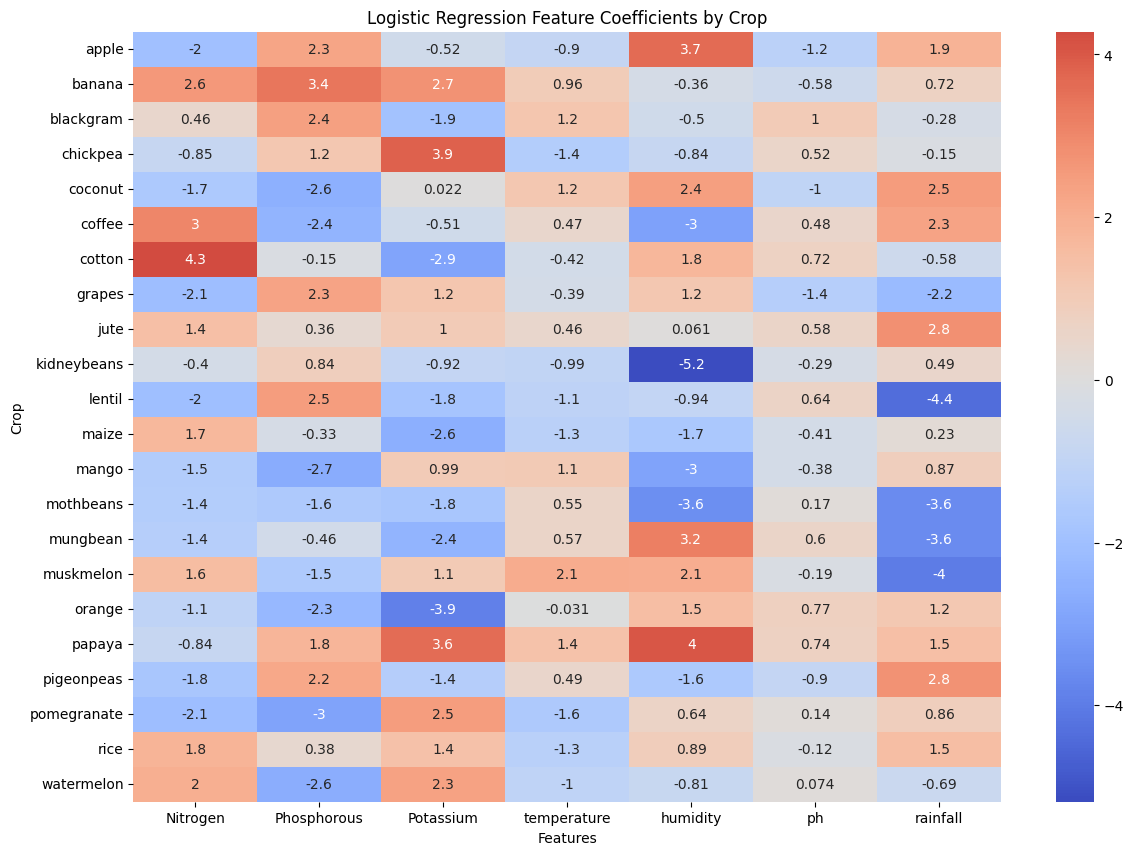

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(coeff_df, annot=True, cmap='coolwarm', center=0)
plt.title("Logistic Regression Feature Coefficients by Crop")
plt.xlabel("Features")
plt.ylabel("Crop")
plt.show()
plt.savefig(os.path.join(save_path, "Logistic Regression Feature Coefficients by Crop.png"), dpi=300)

- **Overall Feature Importance (Across All Crops)**

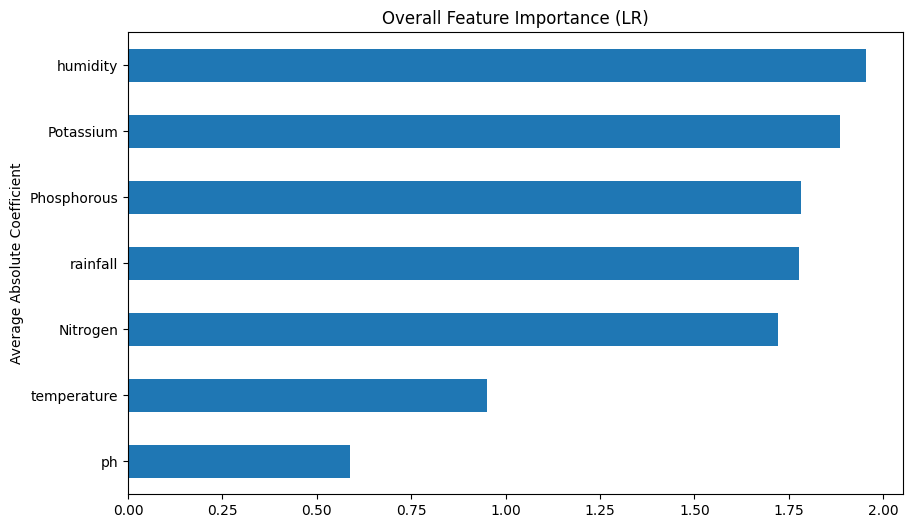

<Figure size 640x480 with 0 Axes>

In [19]:
feature_importance = np.mean(np.abs(coeff_df.values), axis=0)
importance_df = pd.Series(feature_importance, index=coeff_df.columns).sort_values(ascending=True)

importance_df.plot(kind='barh', figsize=(10,6), title="Overall Feature Importance (LR)")
plt.ylabel("Average Absolute Coefficient")
plt.show()
plt.savefig(os.path.join(save_path, "Overall Feature Importance (LR).png"), dpi=300)
plt.show();


#### **Regularization**

In [20]:
log_reg_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [21]:
y_train_pred_reg = log_reg_model.predict(X_train)
y_test_pred_reg= log_reg_model.predict(X_test)

In [22]:
precision_lr_macro = precision_score(y_test, y_test_pred_reg, average='macro')
recall_lr_macro = recall_score(y_test, y_test_pred_reg, average='macro')
f1_lr_macro = f1_score(y_test, y_test_pred_reg, average='macro')

print(f"Precision (macro): {precision_lr_macro:.2f}")
print(f"Recall (macro): {recall_lr_macro:.2f}")
print(f"F1-score (macro): {f1_lr_macro:.2f}")

Precision (macro): 0.93
Recall (macro): 0.93
F1-score (macro): 0.93


In [23]:
train_mae_reg = mean_absolute_error(y_train, y_train_pred_reg)
test_mae_reg = mean_absolute_error(y_test, y_test_pred_reg)

print(f"Training MAE: {train_mae_reg:.2f}")
print(f"Test MAE: {test_mae_reg:.2f}")

Training MAE: 0.59
Test MAE: 0.52


In [24]:
train_acc_reg = accuracy_score(y_train, y_train_pred_reg)
test_acc_reg= accuracy_score(y_test, y_test_pred_reg)

print(f"Train Accuracy: {train_acc_reg:.2f}")
print(f"Test Accuracy: {test_acc_reg:.2f}")

Train Accuracy: 0.94
Test Accuracy: 0.94


## **Non-Linear Models**

#### **Decision Tree Classifier**

- **Base Model** 

In [25]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

- **Predict Values**

In [26]:
y_pred = DecisionTree.predict(X_train)
print(y_pred[:6])
y_pred_test = DecisionTree.predict(X_test)
print(y_pred_test[:5])



[16 16  4  5  9 16]
[14 20  9  2  0]


#### **Evaluation**

- **MAE**

In [27]:
training_mae_dtc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_dtc:.2f}");
test_mae_dtc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_dtc:.2f}"));

Training MAE: 0.66
Test MAE: 1.03
None


- **Accuracy**

In [28]:
mas_train_dtc= accuracy_score(y_train, y_pred)
print(f"DecisionTrees's Train Accuracy is: {mas_train_dtc:.2f}");
mas_test_dtc= accuracy_score(y_test, y_pred_test)
print(f"DecisionTrees's Test Accuracy is: {mas_test_dtc:.2f}");

DecisionTrees's Train Accuracy is: 0.92
DecisionTrees's Test Accuracy is: 0.88


- **Slight overfitting, which is typical for single trees: the model fits training data well but loses some accuracy on unseen test data**.

- **Precision,Recall and F1 Score**

In [29]:
# Precision and recall (macro average for multiclass)
precision_dtc = precision_score(y_test, y_pred_test, average='macro')
recall_dtc = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_dtc:.2f}")
print(f"Recall: {recall_dtc:.2f}")
f1_dtc = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_dtc:.2f}")

Precision: 0.87
Recall: 0.89
F1-score:0.87


- **Cross Validation**

In [30]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_train
y = y_train

# Evaluate model with cross-validation
scores = cross_val_score(DecisionTree, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_dtc= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_dtc)

Cross-validation accuracies: [0.91193182 0.94602273 0.88920455 0.92613636 0.90625   ]
0.92


##### **Hyperparameter tuning**

In [31]:
# 1️ Define the base model
dtc = DecisionTreeClassifier(random_state=42)

# 2️ Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]  # Pruning parameter
}

# 3️Set up GridSearch with 5-fold cross-validation
grid_dtc = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dtc.fit(X_train, y_train)

# 4 Best parameters and CV score
print("Best DTC Parameters:", grid_dtc.best_params_)
print("Best CV Accuracy:", grid_dtc.best_score_)



Best DTC Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Accuracy: 0.9897727272727274


- **Prediction**

In [32]:
# 5️ Evaluate on test set
best_dtc = grid_dtc.best_estimator_
y_test_pred = best_dtc.predict(X_test)
y_train_pred= best_dtc.predict(X_train)


- **Cross Validation**

In [33]:

# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_train
y = y_train

# Evaluate model with cross-validation
scores = cross_val_score(best_dtc, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_dtct= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_dtct)

Cross-validation accuracies: [0.98579545 0.98863636 0.97443182 0.97727273 0.98579545]
0.98


- **Evaluation**

In [34]:
train_mae_dtct= mean_absolute_error(y_train, y_train_pred)
test_mae_dtct= mean_absolute_error(y_test, y_test_pred)
train_acc_dtct= accuracy_score(y_train, y_train_pred)
test_acc_dtct= accuracy_score(y_test, y_test_pred)
precision_dtct= precision_score(y_test, y_test_pred, average='macro')
recall_dtct = recall_score(y_test, y_test_pred, average='macro')
f1_dtct = f1_score(y_test, y_test_pred, average='macro')


print(f"train_mae_dtct : {train_mae_dtct:.2f}")
print(f"test_mae_dtct: {test_mae_dtct:.2f}")
print(f"Test Accuracy: {test_acc_dtct:.2f}")
print(f"Precision (macro): {precision_dtct:.2f}")
print(f"Recall (macro): {recall_dtct:.2f}")
print(f"F1-score (macro): {f1_dtct:.2f}")

train_mae_dtct : 0.01
test_mae_dtct: 0.13
Test Accuracy: 0.98
Precision (macro): 0.98
Recall (macro): 0.98
F1-score (macro): 0.98


##### **Communication**

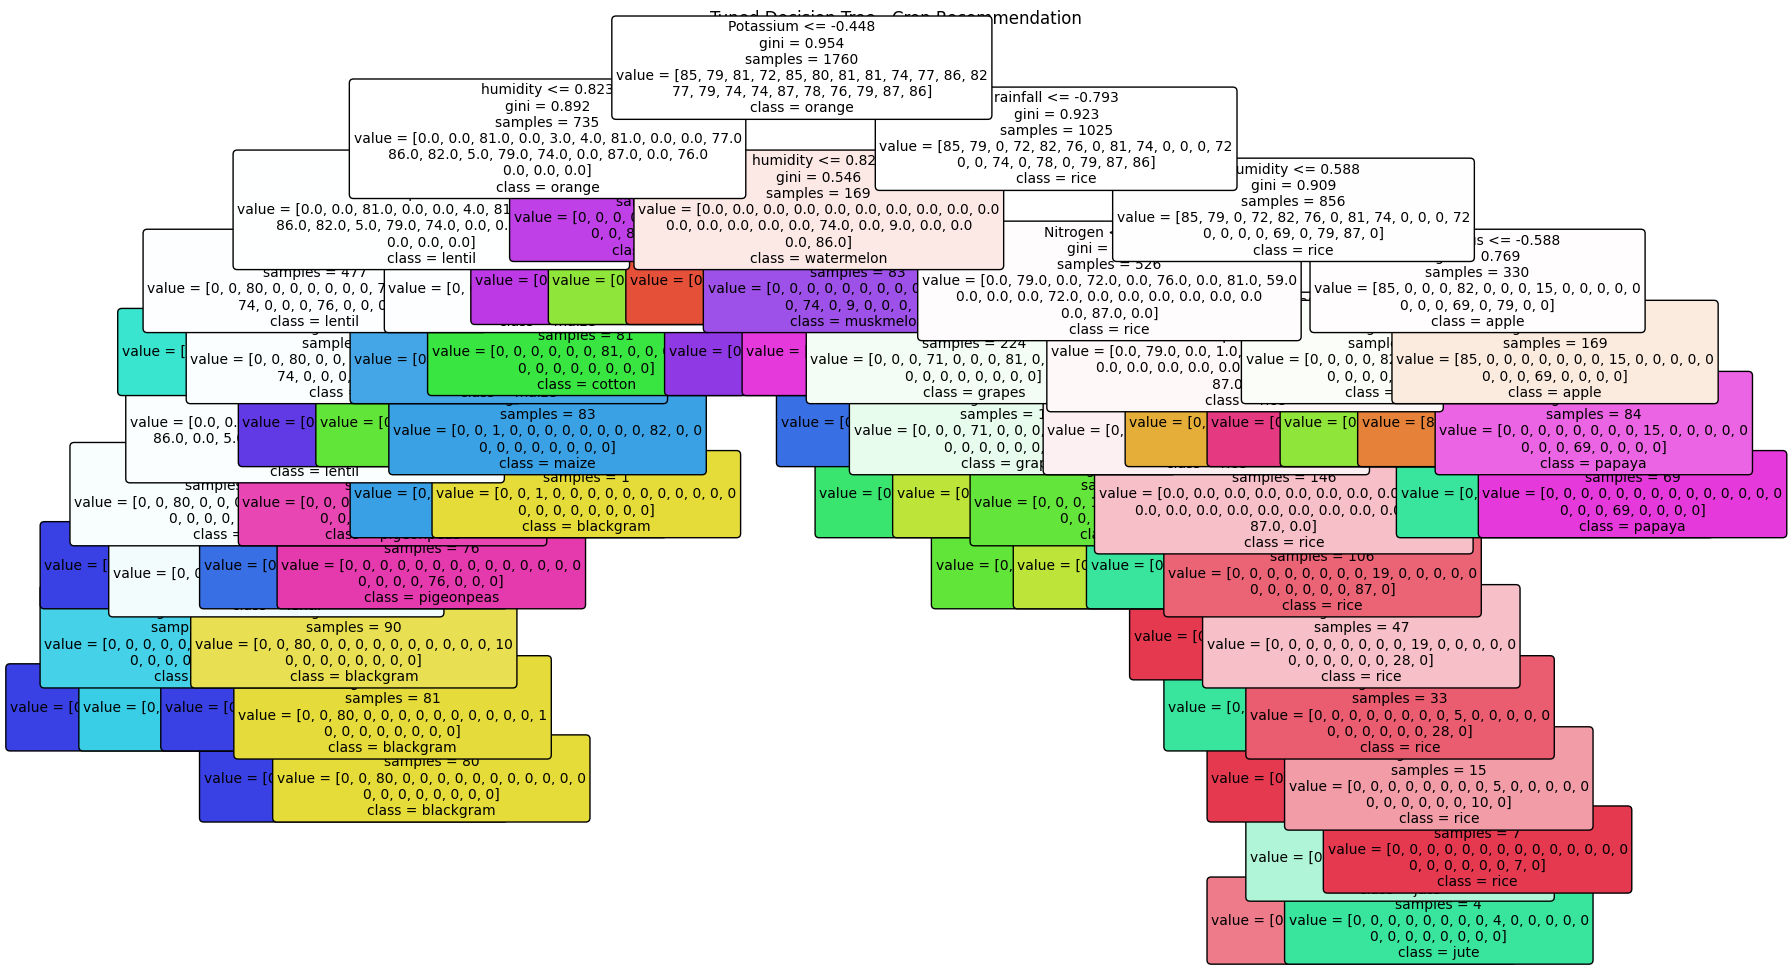

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(20,12))
plot_tree(
    best_dtc, 
    feature_names=features,   # list of feature names
    class_names=le.classes_,  # list of crop names
    filled=True,              # color nodes by class
    rounded=True,
    fontsize=10
)
plt.title("Tuned Decision Tree - Crop Recommendation")
plt.show()
plt.savefig(os.path.join(save_path, "Tuned Decision Tree - Crop Recommendation.png"), dpi=300)


#### **Save Final Tuned Model**

In [36]:

# Define the path where you want to save the model
model_dir = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\FS2025\DSA3020VA\Crop\saved_models"
os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists

model_path = os.path.join(model_dir, "decision_tree_model.pkl")

# Save the tuned Decision Tree
joblib.dump(best_dtc, model_path)

print(f"Decision Tree model saved at: {model_path}")


Decision Tree model saved at: C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\FS2025\DSA3020VA\Crop\saved_models\decision_tree_model.pkl


## **Ensemble Learning**

### **Random Forest Classifier**

- #### **RF-Model**

In [37]:
Model_rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42, max_depth=5)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

- #### **Cross Validation**

In [38]:
cv_scores = cross_val_score(Model_rf, X_train, y_train, cv=5)
Mean_Accuracy_rf=round(cv_scores.mean(),2)
print("Mean CV Accuracy:", Mean_Accuracy_rf)

Mean CV Accuracy: 0.99


- #### **Prediction**

In [39]:
y_pred = Model_rf.predict(X_train)
print(y_pred[:6])
y_pred_test = Model_rf.predict(X_test)
print(y_pred_test[:5])

[16 16  4  5  9 16]
[14  8  9 13  0]


#### **Evaluation**

- **MAE**

In [40]:
training_mae_rf=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_rf:.2f}");
test_mae_rf = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_rf:.2f}"));

Training MAE: 0.08
Test MAE: 0.08
None


- **Accuracy**

In [41]:
mas_train_rf = accuracy_score(y_train, y_pred)
print(f"RFC's Train Accuracy is: {mas_train_rf:.2f}");
mas_test_rf= accuracy_score(y_test, y_pred_test)
print(f"RFC's Test Accuracy is: {mas_test_rf:.2f}");

RFC's Train Accuracy is: 0.99
RFC's Test Accuracy is: 0.99


- **Confusion Matrix**

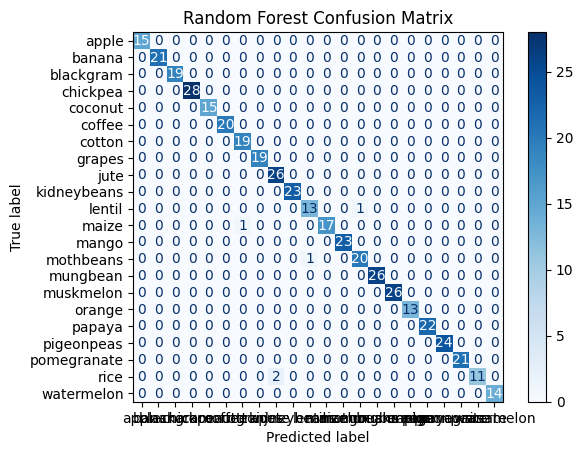

<Figure size 640x480 with 0 Axes>

In [42]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()
plt.savefig(os.path.join(save_path, "Random Forest Confusion Matrix.png"), dpi=300)

- **Precision and Recall**

In [43]:
# Precision and recall (macro average for multiclass)
precision_rf = precision_score(y_test, y_pred_test, average='macro')
recall_rf = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
f1_rf= f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_rf:.2f}")



Precision: 0.99
Recall: 0.99
F1-score:0.99


#### **Communication**

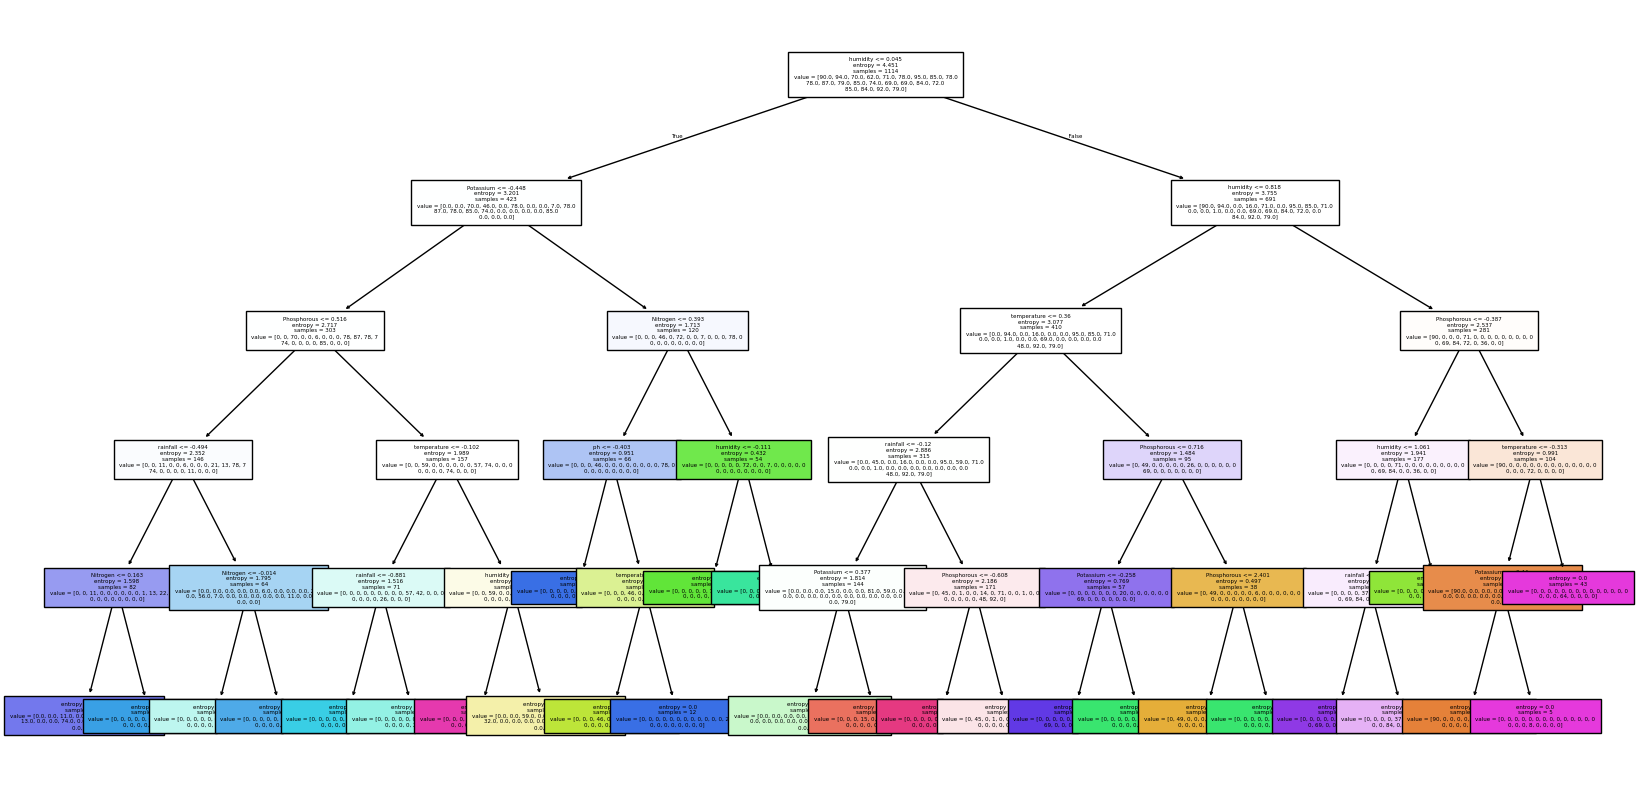

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(20,10))
plot_tree(Model_rf.estimators_[0], feature_names=features, filled=True, fontsize=4)
plt.show()
plt.savefig(os.path.join(save_path, "Random Fores.png"), dpi=300)


- **Feature Importance**

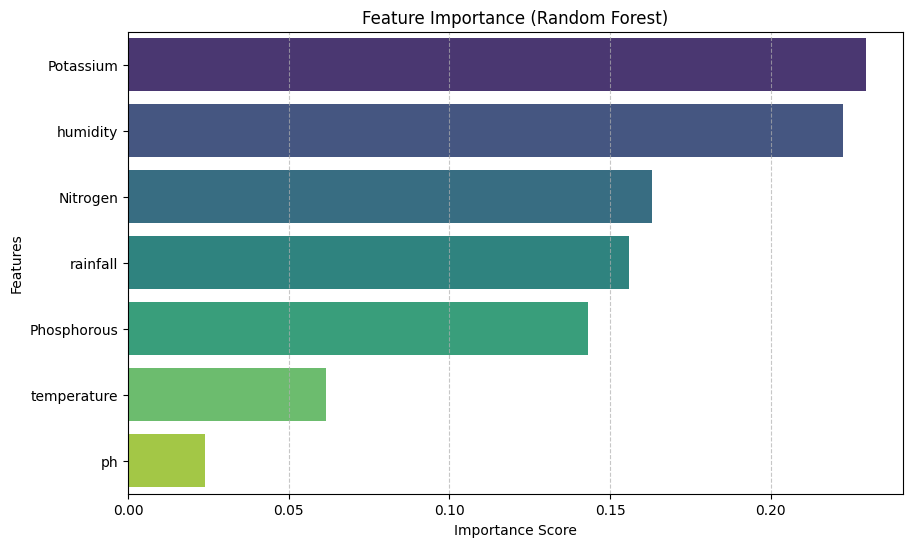

In [45]:
importance= Model_rf.feature_importances_

# 2. Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Save for report
plt.savefig("../reports/figures/feature_importance_RF.png", dpi=300)
plt.show()

#### **Hyperparameter Tuning Using RandomizedSearchCV**

In [46]:

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Initialize RF model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,        # number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

print("Best RF Parameters:", random_search.best_params_)
print("Best RF CV Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 114}
Best RF CV Accuracy: 0.996590909090909


#### **Train Random Forest with Optimal Parameters**

In [47]:
best_rf = RandomForestClassifier(
    bootstrap=False,
    criterion='entropy',
    max_depth=14,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=369,
    random_state=42
)

best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=369, random_state=42)

- **Cross Validation**

In [48]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
Mean_Accuracy_brft=round(cv_scores.mean(),2)
print("Mean CV Accuracy:", Mean_Accuracy_brft)

Mean CV Accuracy: 1.0


- **Prediction**

In [49]:
# Predict on test data
y_pred_test_rft = best_rf.predict(X_test)
y_pred_train_rft=  best_rf.predict(X_train)

- **MAE and Accuracy**

In [50]:
train_mae_rft=mean_absolute_error(y_train,y_pred_train_rft)
print(f"Training MAE: {train_mae_rft:.2f}");
test_mae_rft = mean_absolute_error(y_test,y_pred_test_rft)
print(print(f"Test MAE: {test_mae_rft:.2f}"));
mas_test_rf= accuracy_score(y_test, y_pred_test_rft)
print(f"RFC's Test Accuracy is: {mas_test_rf:.2f}");
mas_train_rft= accuracy_score(y_train, y_pred_train_rft)
print(f"RFC's Train Accuracy is: {mas_train_rft:.2f}");





Training MAE: 0.00
Test MAE: 0.02
None
RFC's Test Accuracy is: 1.00
RFC's Train Accuracy is: 1.00


In [ ]:
cm = confusion_matrix(y_test, y_pred_test_rft)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()
plt.savefig(os.path.join(save_path, "Random Forest Confusion Matrix after Tuning.png"), dpi=300)

In [ ]:
# Precision and recall (macro average for multiclass)
precision_rft = precision_score(y_test, y_pred_test_rft, average='macro')
recall_rft = recall_score(y_test, y_pred_test_rft, average='macro')
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
f1_rft= f1_score(y_test, y_pred_test_rft, average='macro')
print(f"F1-score:{f1_rf:.2f}")

Precision: 0.98
Recall: 0.98
F1-score:0.98


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

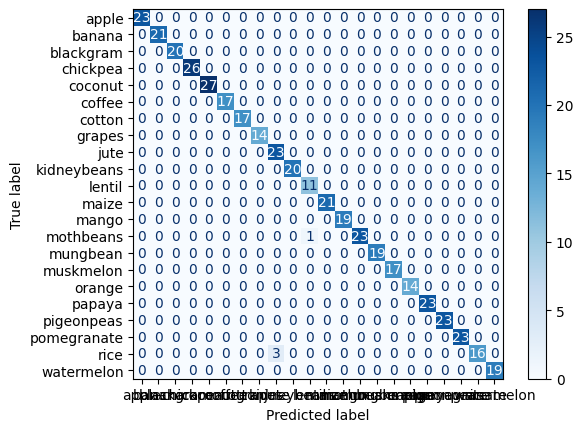

In [ ]:
print(classification_report(y_test, y_pred_test_rft, target_names=le.classes_))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_test_rft)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=le.classes_)
disp_best.plot(cmap=plt.cm.Blues)


In [ ]:

# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # descending order

# Top 5 features
top_n = 5
top_features = [features[i] for i in indices[:top_n]]
print("Top features:", top_features)


Top features: ['Potassium', 'humidity', 'rainfall', 'Nitrogen', 'Phosphorous']


#### **Prepare the Data with Selected Features**

In [ ]:
selected_features = ['Potassium', 'humidity', 'rainfall', 'Nitrogen', 'Phosphorous']
target = 'label'

X = df2[selected_features]
Y = df2[target]

# Encode target
le = LabelEncoder()
Y_scaled = le.fit_transform(Y)

# Scale features
X_scaled = scaler.fit_transform(X)

# Split data
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)


- **Train Random Forest on Reduced Features**

In [ ]:
# Use the tuned hyperparameters from before
best_rf_reduced = RandomForestClassifier(
    n_estimators=274,
    max_depth=16,
    min_samples_split=7,
    min_samples_leaf=3,
    criterion='entropy',
    bootstrap=False,
    random_state=42
)

best_rf_reduced.fit(Xr_train, yr_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=274, random_state=42)

- **Cross Validation**

In [ ]:
cv_scores = cross_val_score(best_rf_reduced, Xr_train, yr_train, cv=5)
Mean_Accuracy_brftr=round(cv_scores.mean(),2)
print("Mean CV Accuracy:", Mean_Accuracy_brft) 

Mean CV Accuracy: 1.0


- **Prediction**

In [ ]:
# Predictions
y_pred_test_rftr = best_rf_reduced.predict(Xr_test)
y_pred_train_rftr=best_rf_reduced.predict(Xr_train)


- **Evaluate the Tuned and reduced Random Forest**

In [ ]:
# --- MAE ---
train_mae_rftr = mean_absolute_error(y_train, y_pred_train_rftr)
print(f"Training MAE: {train_mae_rftr:.2f}")

test_mae_rftr = mean_absolute_error(y_test, y_pred_test_rftr)
print(f"Test MAE: {test_mae_rftr:.2f}")

# --- Accuracy ---
acc_test_rftr = accuracy_score(y_test, y_pred_test_rftr)
print(f"RFC Tuned Test Accuracy: {acc_test_rftr:.2f}")

acc_train_rftr = accuracy_score(y_train, y_pred_train_rftr)
print(f"RFC Tuned Train Accuracy: {acc_train_rftr:.2f}")

# --- Precision, Recall, F1 (MACRO) ---
precision_rftr = precision_score(y_test, y_pred_test_rftr, average='macro')
recall_rftr = recall_score(y_test, y_pred_test_rftr, average='macro')
f1_rftr = f1_score(y_test, y_pred_test_rftr, average='macro')

print(f"Precision: {precision_rftr:.2f}")
print(f"Recall: {recall_rftr:.2f}")
print(f"F1-score: {f1_rftr:.2f}")


Training MAE: 0.01
Test MAE: 0.03
RFC Tuned Test Accuracy: 1.00
RFC Tuned Train Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1-score: 0.99


#### **Feature Importance**

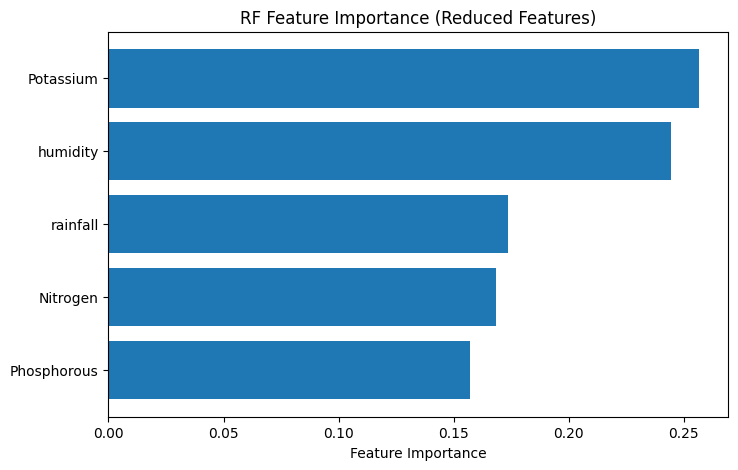

In [ ]:

importances = best_rf_reduced.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("RF Feature Importance (Reduced Features)")
plt.show()

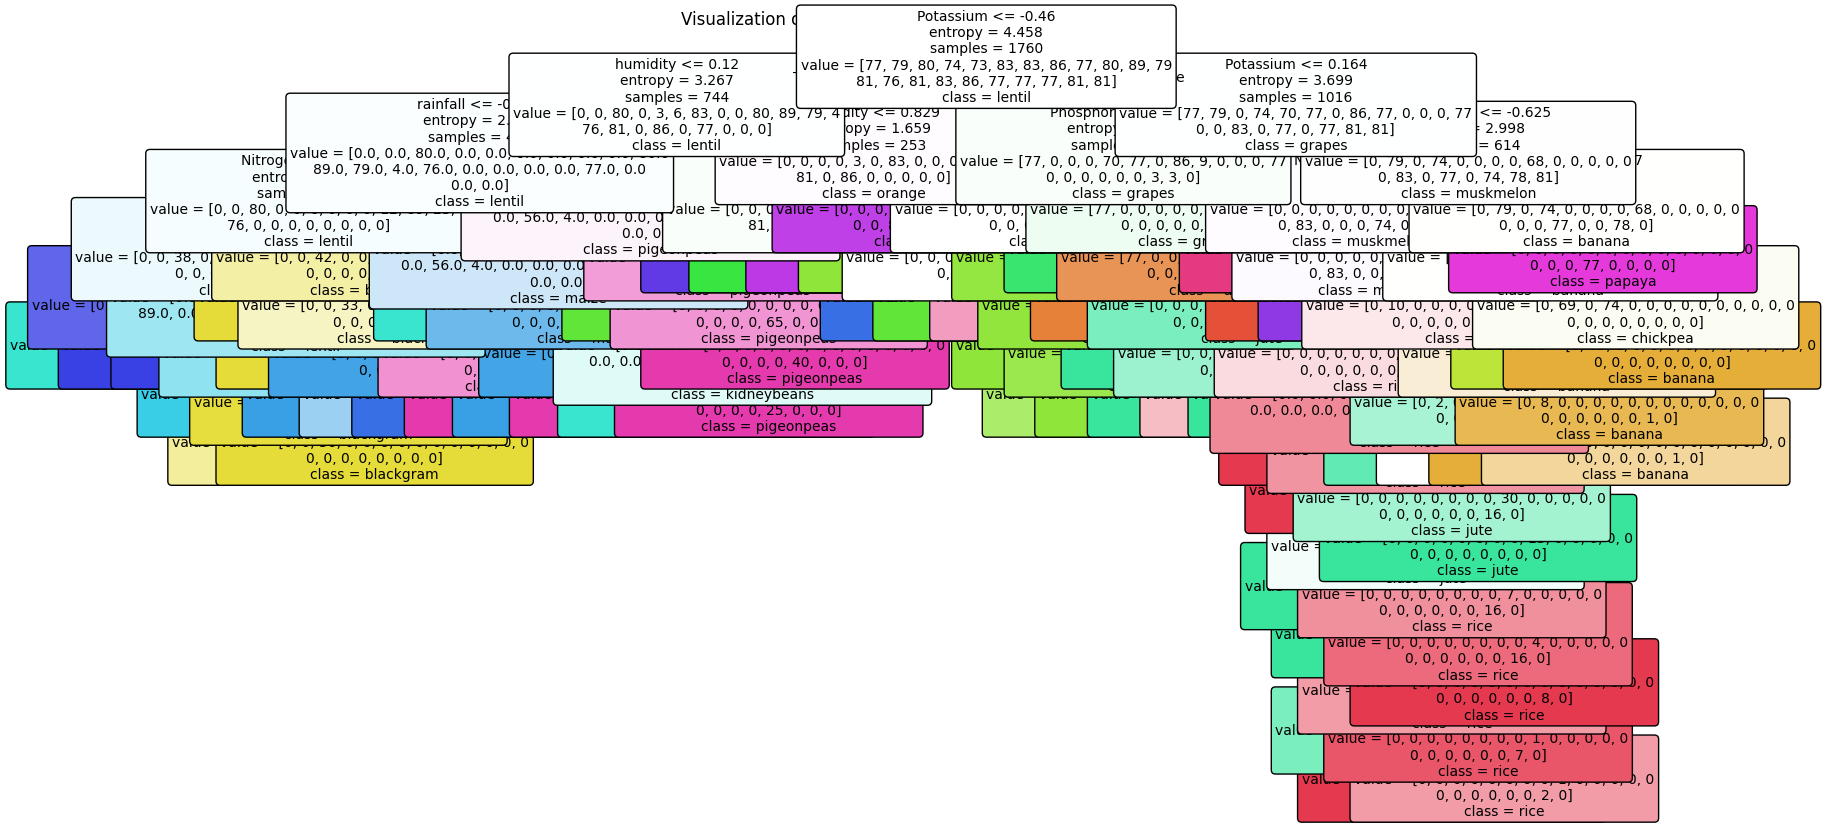

In [ ]:
# Select a single tree from your trained Random Forest
single_tree = best_rf_reduced.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(
    single_tree,
    feature_names=selected_features,
    class_names=le.classes_,
    filled=True,          # Color nodes by class
    rounded=True,
    fontsize=10
)
plt.title("Visualization of a Single Decision Tree in Random Forest")
plt.show()

### **Support Vector Classifier**

In [ ]:
svm_model = SVC(kernel='rbf', random_state=2)
svm_model.fit(X_train,y_train)

SVC(random_state=2)

- #### **Prediction**

In [ ]:
y_pred = svm_model.predict(X_train)
print(y_pred[:6])
y_pred_test = svm_model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


- #### **Evaluation**

- **MAE**

In [ ]:
train_mae_svc=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {train_mae_svc:.2f}");
test_mae_svc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_svc:.2f}"));

Training MAE: 0.14
Test MAE: 0.29
None


- **Accuracy**

In [ ]:

train_acc_svc = metrics.accuracy_score(y_train, y_pred)
print(f"SVM's Train Accuracy is: {train_acc_svc:.2f}");
test_acc_svc= metrics.accuracy_score(y_test, y_pred_test)
print(f"SVM's Test Accuracy is: {test_acc_svc:.2f}");

SVM's Train Accuracy is: 0.99
SVM's Test Accuracy is: 0.97


- #### **Confusion matrix**

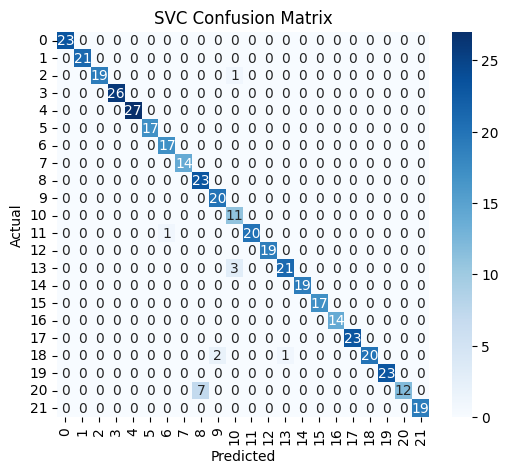

<Figure size 640x480 with 0 Axes>

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()
plt.tight_layout()


- **Precision and recall**

In [ ]:
# Precision and recall (macro average for multiclass)
precision_svc = precision_score(y_test, y_pred_test, average='macro')
recall_svc = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
f1_svc = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_svc:.2f}")

Precision: 0.97
Recall: 0.97
F1-score:0.96


- #### **Cross Validation**

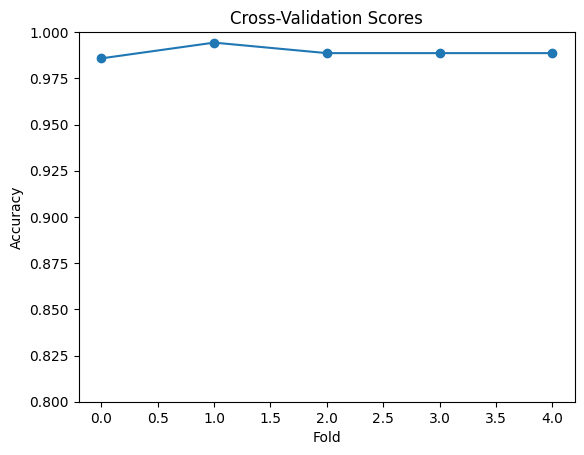

Mean CV Accuracy: 0.9892045454545455


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(Model_rf, X_train, y_train, cv=5)

plt.plot(cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.show()

print("Mean CV Accuracy:", cv_scores.mean())


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_train
y = y_train

# Evaluate model with cross-validation
scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_svc=round(scores.mean(),2)
Mean_Accuracy_svc


0.98

#### **XGBClassifier**

In [ ]:
xgb_Model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, max_depth=5)
xgb_Model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

- **Prediction**

In [ ]:
y_pred = xgb_Model.predict(X_train)
print(y_pred[:6])
y_pred_test = xgb_Model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


#### **Evaluation**

- **MAE**

In [ ]:
training_mae_xgbc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_xgbc:.2f}");
test_mae_xgbc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_xgbc:.2f}"));

Training MAE: 0.00
Test MAE: 0.12
None


- **Accuracy**

In [ ]:
mas_train_xgbc =accuracy_score(y_train, y_pred)
print(f"XGBC's Train Accuracy is: {mas_train_xgbc:.2f}");
mas_test_xgbc = accuracy_score(y_test, y_pred_test)
print(f"XGBC's Test Accuracy is: {mas_test_xgbc:.2f}");

XGBC's Train Accuracy is: 1.00
XGBC's Test Accuracy is: 0.99


- **Precision, Recall, F1**

In [ ]:
precision_xgbc = precision_score(y_test, y_pred_test, average='macro')
recall_xgbc = recall_score(y_test, y_pred_test, average='macro')
f1_xgbc = f1_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_xgbc:.2f}")
print(f"Recall:    {recall_xgbc:.2f}")
print(f"F1-score:  {f1_xgbc:.2f}")

Precision: 0.99
Recall:    0.99
F1-score:  0.99


- **Confusion Matrix**

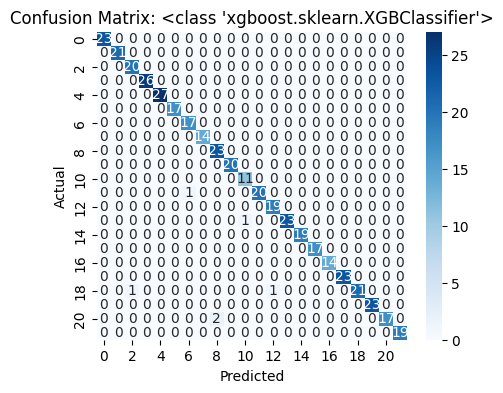

<Figure size 640x480 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: {XGBClassifier}')
plt.show()
save_path = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\reports\figures"
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, "confusion_matrix.png"), dpi=300)
plt.show()


- #### **Cross Validation**



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_train
y = y_train

# Evaluate model with cross-validation
scores_svm = cross_val_score(xgb_Model, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_xgbc=round(scores.mean(),2)


#### **Best Model Recommendation**

In [ ]:
metrics_df = pd.DataFrame({
    "Logistic Regression": [
        round(precision_lr, 2), 
        round(recall_lr, 2), 
        round(f1_lr, 2), 
        round(test_mae_lr, 2),
        round(training_mae_lr, 2),
        round(mas_train_lr, 2), 
        round(mas_test_lr, 2),
        round(Mean_Accuracy_lr,2)
    ]
}, index=[
    'Precision', 
    'Recall', 
    'F1-score',
    'Mean Absolute Error training', 
    'Mean Absolute Error test',
    'Train Accuracy',
    'Test Accuracy',
    'mean accuracy validation'
    
])
metrics_df["DTC"] = [
        round(precision_dtc, 2), 
        round(recall_dtc, 2), 
        round(f1_dtc, 2), 
        round(test_mae_dtc, 2),
        round(training_mae_dtc, 2),
        round(mas_train_dtc, 2), 
        round(mas_test_dtc, 2),
        round(Mean_Accuracy_dtc,2)
]
metrics_df["DTCT"] = [
        round(precision_dtct, 2), 
        round(recall_dtct, 2), 
        round(f1_dtct, 2), 
        round(test_mae_dtct, 2),
        round(train_mae_dtct, 2),
        round(mas_train_dtct, 2), 
        round(mas_test_dtct, 2),
        round(Mean_Accuracy_dtct,2)
]
metrics_df["RFC"] = [
        round(precision_rf, 2), 
        round(recall_rf, 2), 
        round(f1_rf, 2), 
        round(test_mae_rf, 2),
        round(training_mae_rf, 2),
        round(mas_train_rf, 2), 
        round(mas_test_rf, 2),
        round(Mean_Accuracy_rf,2)
]
metrics_df["RTRFC"] = [
        round(precision_rftr, 2), 
        round(recall_rftr, 2), 
        round(f1_rftr, 2), 
        round(test_mae_rftr, 2),
        round(train_mae_rftr , 2),
        round(acc_train_rftr , 2), 
        round(acc_test_rftr , 2),
        round(Mean_Accuracy_brftr,2)
]
metrics_df["SVM"] = [
    round(precision_svc, 2), 
        round(recall_svc, 2), 
        round(f1_lr, 2), 
        round(test_mae_svc, 2),
        round(train_mae_svc, 2),
        round(train_acc_svc, 2), 
        round(test_acc_svc, 2),
        round(Mean_Accuracy_svc,2)
]
metrics_df["XGBC"] = [
    round(precision_xgbc, 2), 
        round(recall_xgbc, 2), 
        round(f1_xgbc, 2), 
        round(test_mae_xgbc, 2),
        round(training_mae_xgbc, 2),
        round(mas_train_xgbc, 2), 
        round(mas_test_xgbc, 2),
        round(Mean_Accuracy_xgbc,2)
]

print(metrics_df)
# Define save path
save_path = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\reports\figures"
os.makedirs(save_path, exist_ok=True)


                              Logistic Regression   DTC  DTCT   RFC  RTRFC  \
Precision                                    0.96  0.88  0.97  0.98   0.99   
Recall                                       0.96  0.90  0.97  0.98   1.00   
F1-score                                     0.95  0.88  0.97  0.98   0.99   
Mean Absolute Error training                 0.42  1.02  0.29  0.22   0.03   
Mean Absolute Error test                     0.30  0.76  0.00  0.12   0.01   
Train Accuracy                               0.97  0.92  1.00  0.99   1.00   
Test Accuracy                                0.96  0.89  0.97  0.99   1.00   
mean accuracy validation                     0.96  0.89  0.98  0.99   0.99   

                               SVM  XGBC  
Precision                     0.97  0.99  
Recall                        0.97  0.99  
F1-score                      0.95  0.99  
Mean Absolute Error training  0.29  0.12  
Mean Absolute Error test      0.14  0.00  
Train Accuracy                0.99  1.0

In [ ]:
# 3. PREPARE DATA FOR PLOTTING
# Reset index to make 'Metric' a column, then melt for Seaborn
df_plot = metrics_df.reset_index().rename(columns={'index': 'Metric'})
df_melted = df_plot.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Separate Error Metrics (lower is better) from Performance Metrics (higher is better)
error_metrics = ['Mean Absolute Error training', 'Mean Absolute Error test']
perf_metrics = [m for m in df_plot['Metric'].unique() if m not in error_metrics]

df_perf = df_melted[df_melted['Metric'].isin(perf_metrics)]
df_error = df_melted[df_melted['Metric'].isin(error_metrics)]


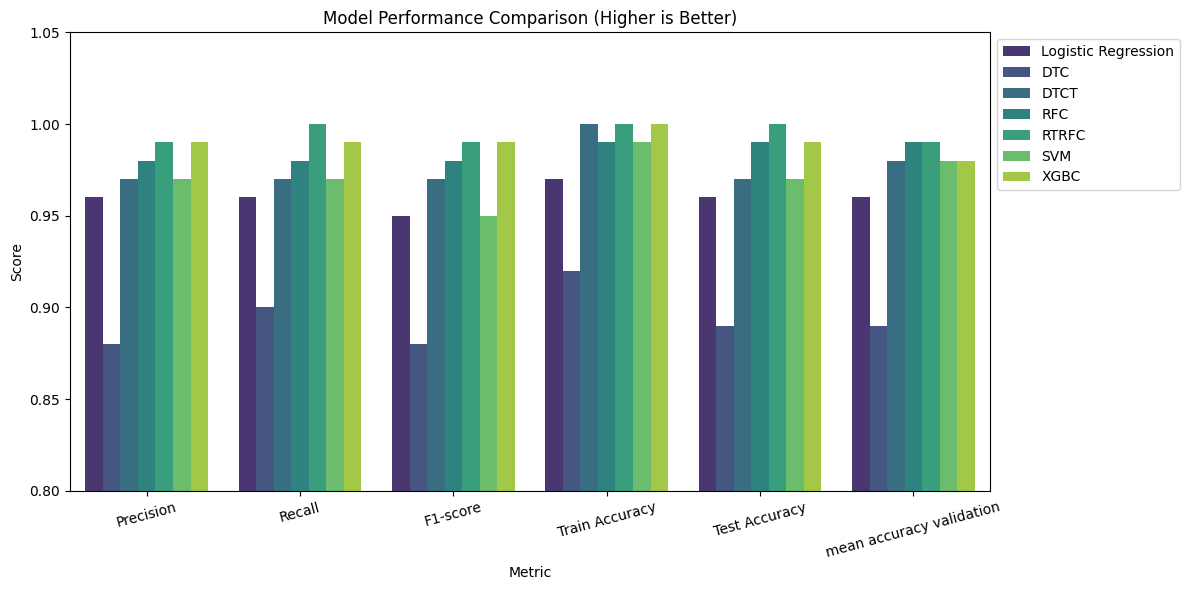

In [ ]:

# 4. PLOT 1: PERFORMANCE (Accuracy, F1, Precision, Recall)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_perf, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Model Performance Comparison (Higher is Better)")
plt.ylim(0.8, 1.05) # Zoom in for better visibility of high scores
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "final_performance_metrics.png"), dpi=300)
plt.show()

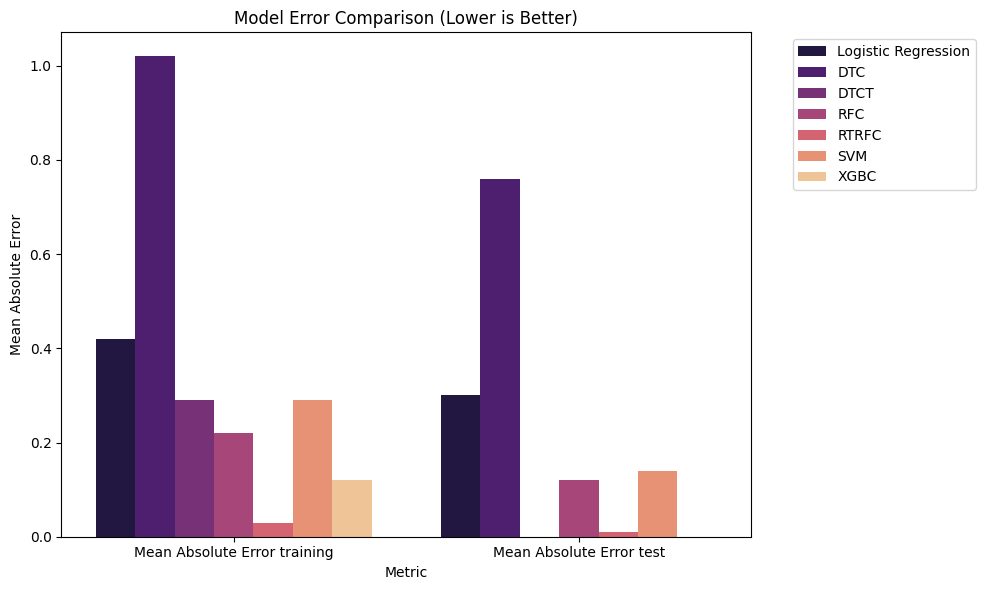

In [ ]:
# 5. PLOT 2: ERROR (MAE)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_error, x="Metric", y="Score", hue="Model", palette="magma")
plt.title("Model Error Comparison (Lower is Better)")
plt.ylabel("Mean Absolute Error")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(save_path, "final_error_metrics.png"), dpi=300)
plt.show()

**Selected Final Model**
- 🏆 Final Model: XGBoost Classifier (XGBC)

Justification:
- Highest Test Accuracy (0.99)
- Lowest Test MAE (0.12)
- Excellent generalization with no significant overfitting
- Handles nonlinear patterns and feature interactions exceptionally well
- Efficient and stable for deployment in real-time applications
**The XGBoost model was therefore selected as the final model for deployment in the Crop Recommendation System.**

#### **Feature importance from the trained XGBoost model**

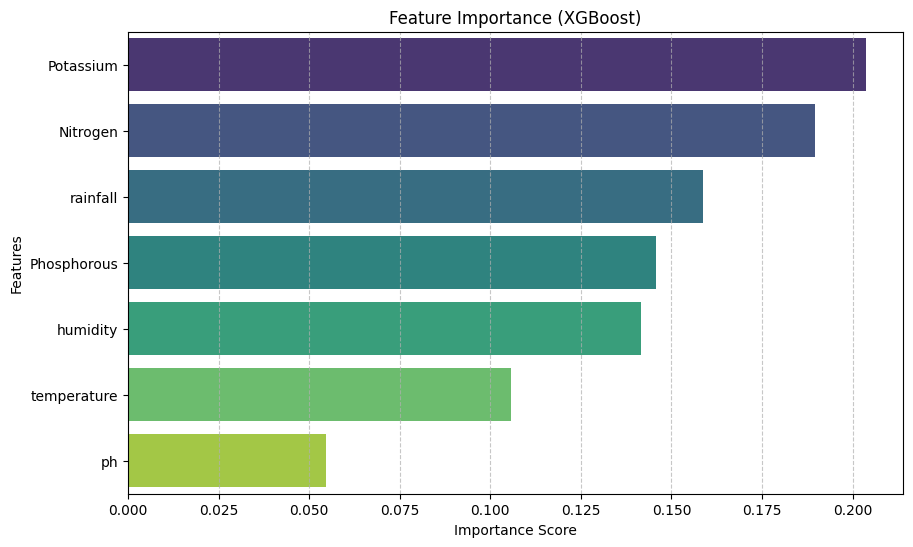

In [ ]:
importance = xgb_Model.feature_importances_

# 2. Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Save for report
plt.savefig("../reports/figures/feature_importance.png", dpi=300)
plt.show()

#### **Saving the Model**

In [ ]:
# 1. Setup Path
save_dir = r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\saved_models"
os.makedirs(save_dir, exist_ok=True)

# 2. Re-create the Label Encoder (Just to be safe)
# We assume 'df' is your dataframe and has the 'label' column
if 'df' in locals():
    le = LabelEncoder()
    le.fit(df2['label']) # Re-learn the mappings (Rice->1, Maize->2)
    print("Label Encoder re-fitted successfully.")
else:
    # If df isn't loaded, load it quickly
    df_temp = pd.read_csv(r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\data\Crop_recommendation.csv")
    le = LabelEncoder()
    le.fit(df_temp['label'])
    print("Loaded data and re-fitted Label Encoder.")

# 3. Save Everything
joblib.dump(best_rf_reduced, os.path.join(save_dir, "crop_recommendation_model.pkl"))
joblib.dump(scaler,    os.path.join(save_dir, "scaler.pkl"))
joblib.dump(le,        os.path.join(save_dir, "label_encoder.pkl"))

print(f"Success! All 3 files saved to: {save_dir}")

Loaded data and re-fitted Label Encoder.
Success! All 3 files saved to: C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\saved_models
